# Exercício CNN MNIST

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load Data

In [5]:
# Carregar os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# CNN Architecture and Training

In [28]:
# Definir a CNN
model = Sequential([
    Conv2D(4*8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(4*16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout(rate=0.25),
    Flatten(),
    Dense(128, activation='relu'),
    # Dropout(rate=0.25),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10


/home/diogomuzzi/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8466 - loss: 0.5442 - val_accuracy: 0.9747 - val_loss: 0.0904
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9770 - loss: 0.0718 - val_accuracy: 0.9842 - val_loss: 0.0539
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9856 - loss: 0.0486 - val_accuracy: 0.9857 - val_loss: 0.0492
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9882 - val_loss: 0.0423
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9881 - val_loss: 0.0398
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9885 - val_loss: 0.0398
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9888 - val_loss: 0.0406
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.989

# Model Evaluation

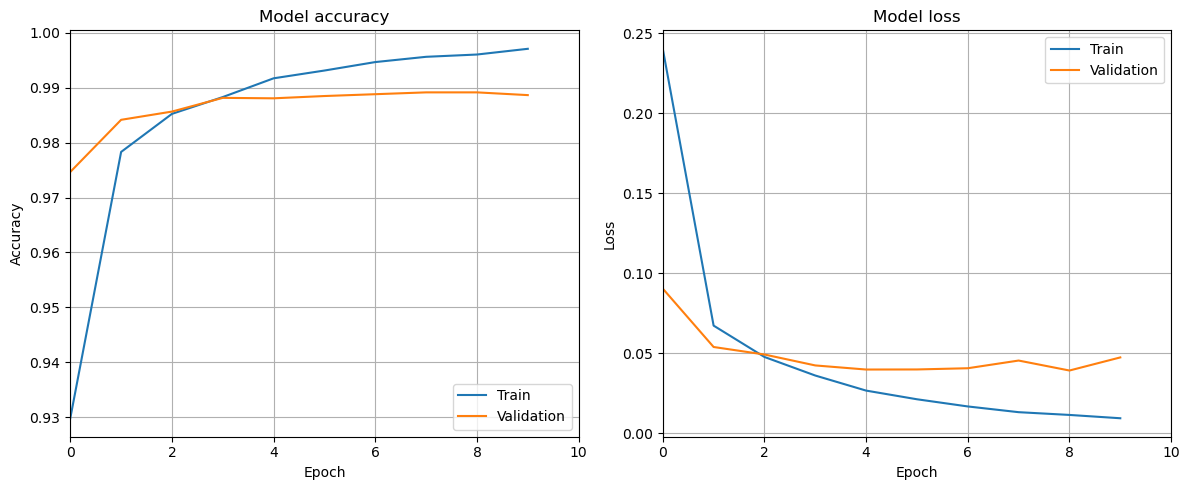

In [31]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid()
plt.xlim(0, 10)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.xlim(0, 10)

plt.tight_layout()

In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0485
Loss: 0.0398, Accuracy: 0.9889
